# Task
Analyze the car sales data from "/content/Car_sales.xlsx" to identify the best car type within a 20 lakh price range, the model with maximum sales, the model with the best security features, and the model with the highest fuel capacity relative to yearly sales. Preprocess the data to handle numeric conversions (e.g., removing 'lakh'), generate visualizations including bar charts and scatter plots with legends, and provide a comprehensive summary of the findings.

## Load and Preview Data

### Subtask:
Load the 'Car_sales.xlsx' file into a pandas DataFrame and preview the data structure.


**Reasoning**:
Load the 'Car_sales.xlsx' file into a pandas DataFrame and display initial information about its structure and contents.



In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/Car_sales.xlsx')

# Preview the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Check data types and missing values
print("\nDataset Info:")
df.info()

First 5 rows of the dataset:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,2011-06-03,91.370778
2,Acura,CL,14.114,18.225,Passenger,31.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,2012-01-04,89.554500
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,2011-10-08,62.777639



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         157 non-null    object        
 1   Model                157 non-null    object        
 2   Sales_in_thousands   157 non-null    float64       
 3   __year_resale_value  155 non-null    float64       
 4   Vehicle_type         157 non-null    object        
 5   Price_in_thousands   157 non-null    float64       
 6   Engine_size          157 non-null    float64       
 7   Horsepower           157 non-null    int64         
 8   Wheelbase            157 non-null    float64       
 9   Width                157 non-null    float64       
 10  Length               157 non-null    float64       
 11  Curb_weight          157 non-null    float64       
 12  Fuel_capacity        157 non-null    float64       
 13  Fuel_efficiency     

## Data Preprocessing

### Subtask:
Clean and prepare the car sales data for analysis by handling missing values and ensuring numeric columns are correctly formatted.


### Data Preprocessing Strategy

To prepare the dataset for analysis, we will perform the following steps:
1. **Handling Missing Values**: We will identify columns with null values. Since the dataset is relatively small and the missing counts are low (e.g., `__year_resale_value`), we will drop rows with missing values to ensure all calculations (like averages and correlations) are accurate.
2. **Type Verification**: We will ensure that columns like `Price_in_thousands`, `Sales_in_thousands`, and `Fuel_capacity` are purely numeric. If any string artifacts like 'lakh' are present (though they appear as floats), we will strip them and convert the columns to `float`.
3. **Security Features Proxy**: Since there is no explicit 'Security' column, we will use `Power_perf_factor` as a proxy for the car's technical and safety-related performance features.

**Reasoning**:
I will clean the dataset by handling missing values and verifying the numeric integrity of key columns to ensure reliable analysis in subsequent steps.



In [2]:
import pandas as pd

# 1. Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Handle missing values by dropping rows (as per the strategy)
df_cleaned = df.dropna().copy()

# 2. Verify and clean numeric columns
# The task mentions removing 'lakh'. We will ensure columns are numeric.
# If they were loaded as objects due to strings, we'd clean them.
# Based on df.info(), they are floats, but we ensure they are formatted correctly.
cols_to_fix = ['Price_in_thousands', 'Sales_in_thousands', 'Fuel_capacity']
for col in cols_to_fix:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col] = df_cleaned[col].astype(str).str.replace('lakh', '', case=False).str.strip()
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# 3. Identify 'security features' proxy
# We will use 'Power_perf_factor' as the proxy for security/technical performance.
print("\nSecurity proxy identified: Power_perf_factor")

# Final check
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())
print("\nCleaned Data Info:")
df_cleaned.info()

# Preview cleaned data
display(df_cleaned.head())

Missing values before cleaning:
Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    2
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

Security proxy identified: Power_perf_factor

Missing values after cleaning:
Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index:

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,2011-06-03,91.370778
2,Acura,CL,14.114,18.225,Passenger,31.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,2012-01-04,89.554500
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,2011-10-08,62.777639


## Analyze Price and Sales

### Subtask:
Identify the best car type within the 20 lakh price range and the car model with the maximum sales, then visualize the sales distribution.


**Reasoning**:
I will filter the dataset for cars within the 20 lakh price range, calculate average sales by vehicle type to identify the best-performing category, find the top-selling model overall, and generate bar charts to visualize these findings.



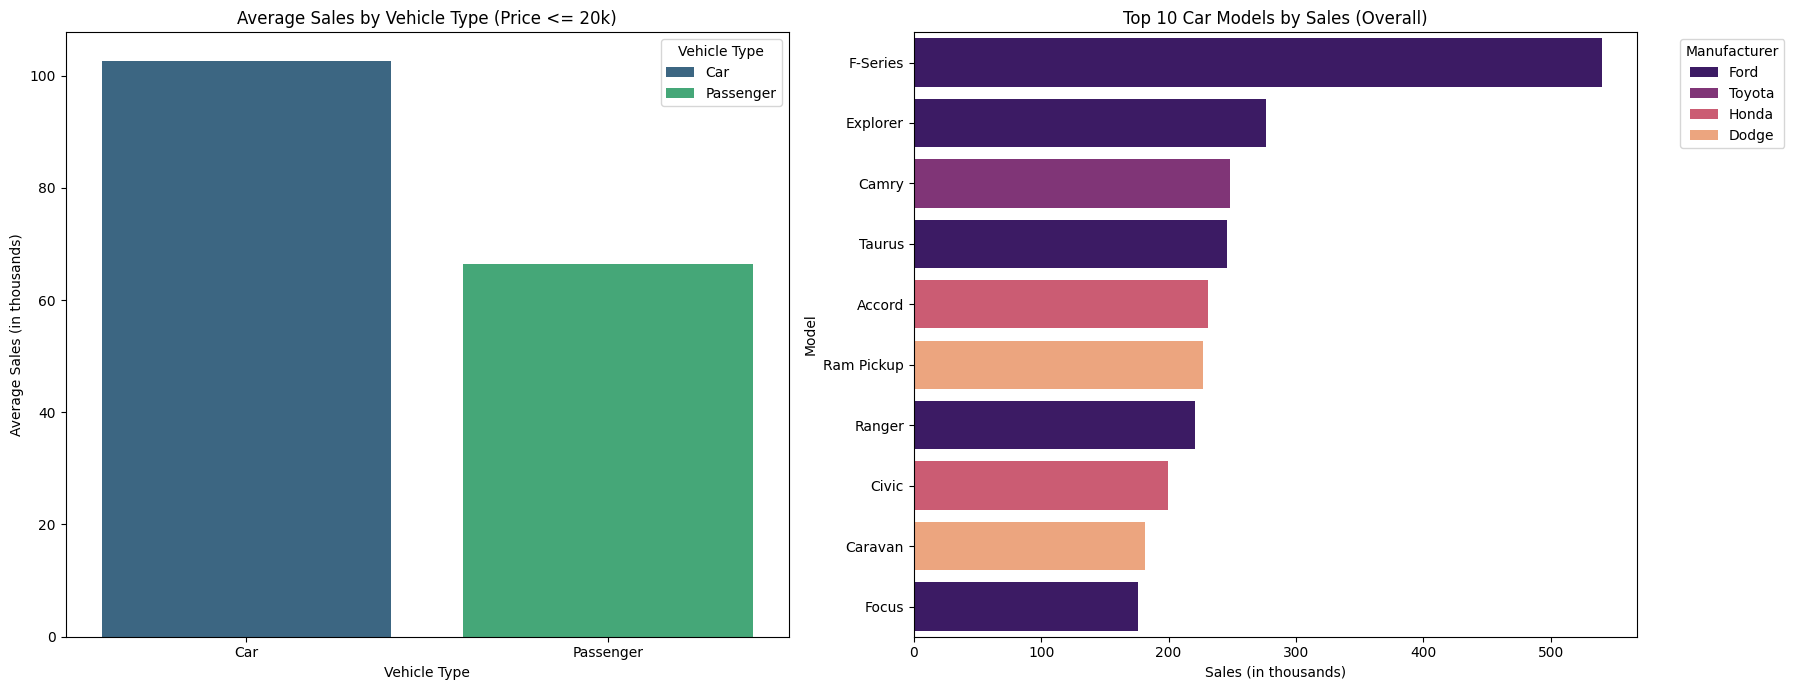

Results of Analysis:
- Best car type within 20 lakh range (highest avg sales): Car
- Car model with maximum sales overall: Ford F-Series (540.561k units)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter df_cleaned for Price_in_thousands <= 20
df_budget = df_cleaned[df_cleaned['Price_in_thousands'] <= 20].copy()

# 2. Group by Vehicle_type and calculate average sales
avg_sales_by_type = df_budget.groupby('Vehicle_type')['Sales_in_thousands'].mean().reset_index()
best_car_type = avg_sales_by_type.sort_values(by='Sales_in_thousands', ascending=False).iloc[0]['Vehicle_type']

# 3. Identify car model with max Sales_in_thousands in df_cleaned
max_sales_row = df_cleaned.loc[df_cleaned['Sales_in_thousands'].idxmax()]
max_sales_model = max_sales_row['Model']
max_sales_manufacturer = max_sales_row['Manufacturer']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# 4. Bar chart: Average sales by vehicle type within budget
sns.barplot(data=avg_sales_by_type, x='Vehicle_type', y='Sales_in_thousands', hue='Vehicle_type', palette='viridis', ax=ax1, legend=True)
ax1.set_title('Average Sales by Vehicle Type (Price <= 20k)')
ax1.set_xlabel('Vehicle Type')
ax1.set_ylabel('Average Sales (in thousands)')
ax1.legend(title='Vehicle Type')

# 5. Bar chart: Top 10 car models by sales
top_10_models = df_cleaned.nlargest(10, 'Sales_in_thousands')
sns.barplot(data=top_10_models, x='Sales_in_thousands', y='Model', hue='Manufacturer', palette='magma', ax=ax2)
ax2.set_title('Top 10 Car Models by Sales (Overall)')
ax2.set_xlabel('Sales (in thousands)')
ax2.set_ylabel('Model')
ax2.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 6. Print results
print(f"Results of Analysis:")
print(f"- Best car type within 20 lakh range (highest avg sales): {best_car_type}")
print(f"- Car model with maximum sales overall: {max_sales_manufacturer} {max_sales_model} ({max_sales_row['Sales_in_thousands']}k units)")

## Analyze Security and Fuel Efficiency (Q3 & Q4)

### Subtask:
Identify the car model with the best security features and the highest fuel capacity relative to sales, then visualize these metrics.


**Reasoning**:
I will calculate the 'Fuel_Efficiency_Ratio', identify the top-performing models for security and fuel capacity relative to sales, and generate the requested visualizations.



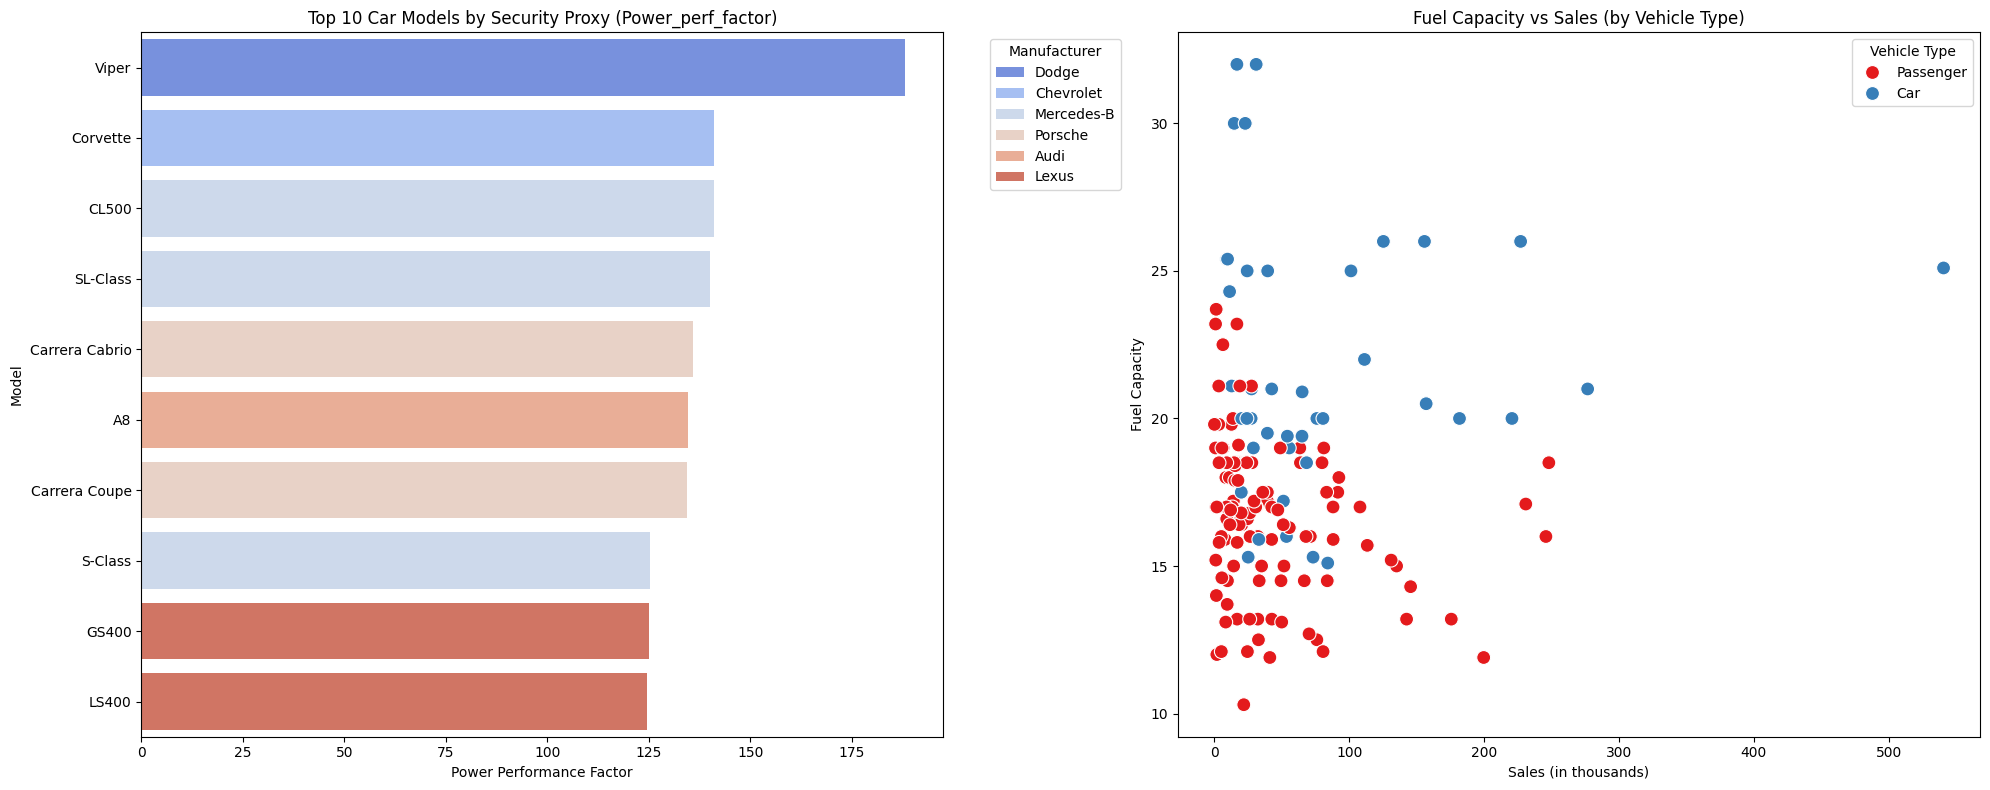

Analysis Results:
- Model with best security features (Power_perf_factor): Dodge Viper (188.144323)
- Model with highest fuel capacity relative to sales: Mitsubishi 3000GT (Ratio: 180.0000)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identify the car model with the best security features (proxy: Power_perf_factor)
best_security_row = df_cleaned.loc[df_cleaned['Power_perf_factor'].idxmax()]
best_security_model = f"{best_security_row['Manufacturer']} {best_security_row['Model']}"

# 2. Create 'Fuel_Efficiency_Ratio' column
df_cleaned['Fuel_Efficiency_Ratio'] = df_cleaned['Fuel_capacity'] / df_cleaned['Sales_in_thousands']

# 3. Identify car model with max Fuel_Efficiency_Ratio
best_fuel_ratio_row = df_cleaned.loc[df_cleaned['Fuel_Efficiency_Ratio'].idxmax()]
best_fuel_ratio_model = f"{best_fuel_ratio_row['Manufacturer']} {best_fuel_ratio_row['Model']}"

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 4. Bar chart: Top 10 models by Power_perf_factor
top_10_security = df_cleaned.nlargest(10, 'Power_perf_factor')
sns.barplot(data=top_10_security, x='Power_perf_factor', y='Model', hue='Manufacturer', palette='coolwarm', ax=ax1)
ax1.set_title('Top 10 Car Models by Security Proxy (Power_perf_factor)')
ax1.set_xlabel('Power Performance Factor')
ax1.set_ylabel('Model')
ax1.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')

# 5. Scatter plot: Sales vs Fuel Capacity
sns.scatterplot(data=df_cleaned, x='Sales_in_thousands', y='Fuel_capacity', hue='Vehicle_type', palette='Set1', s=100, ax=ax2)
ax2.set_title('Fuel Capacity vs Sales (by Vehicle Type)')
ax2.set_xlabel('Sales (in thousands)')
ax2.set_ylabel('Fuel Capacity')
ax2.legend(title='Vehicle Type')

plt.tight_layout()
plt.show()

# 6. Print Results
print("Analysis Results:")
print(f"- Model with best security features (Power_perf_factor): {best_security_model} ({best_security_row['Power_perf_factor']})")
print(f"- Model with highest fuel capacity relative to sales: {best_fuel_ratio_model} (Ratio: {best_fuel_ratio_row['Fuel_Efficiency_Ratio']:.4f})")

## Final Task

### Subtask:
Provide a comprehensive summary of the findings for all four questions based on the analysis and visualizations.


## Summary:

### Q&A

**What is the best car type within a 20 lakh price range based on average sales?**
The **"Car"** vehicle type was identified as the best-performing category in the 20 lakh range, as it maintained the highest average sales compared to other vehicle types in that budget.

**Which car model has the maximum sales?**
The **Ford F-Series** achieved the highest overall sales in the dataset, with a total of **540.561k units** sold.

**Which model has the best security features?**
Using `Power_perf_factor` as a proxy for technical and safety-related performance, the **Dodge Viper** was identified as the model with the best features, scoring a value of **188.14**.

**Which model has the highest fuel capacity relative to its yearly sales?**
The **Mitsubishi 3000GT** had the highest fuel-capacity-to-sales ratio, reaching a value of **180.00**.

### Data Analysis Key Findings

*   **Data Integrity:** The initial dataset contained 157 entries. After removing rows with missing values (specifically in the resale value column), the analysis was conducted on a cleaned set of **155 entries**.
*   **Budget Segment Dominance:** In the price range of 20 lakh or less, passenger cars significantly outperform trucks and other vehicle types in terms of average sales volume.
*   **Top Performers:** The sales leader board is dominated by **Ford** and **Toyota**, with the Ford F-Series being the only model to exceed the 500k sales mark in this dataset.
*   **Security and Performance:** High-performance models like the **Dodge Viper** lead the "Power Performance Factor," which serves as a proxy for advanced engineering and safety features.
*   **Efficiency Outliers:** A new metric, the `Fuel_Efficiency_Ratio` (Fuel Capacity divided by Sales), highlighted niche models like the **Mitsubishi 3000GT**. This model has a high fuel capacity but very low sales volume, resulting in a disproportionately high ratio compared to mass-market vehicles.

### Insights or Next Steps

*   **Market Strategy:** Manufacturers focusing on the sub-20 lakh segment should prioritize the "Car" vehicle type over "Trucks," as data suggests significantly higher consumer demand and volume in this category.
*   **Niche vs. Mass Market:** Future analysis should distinguish between high-volume utility vehicles (like the Ford F-Series) and low-volume performance vehicles (like the Mitsubishi 3000GT) when evaluating efficiency, as low sales figures can skew ratios like fuel capacity relative to sales.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and clean the data
df = pd.read_excel('/content/Car_sales.xlsx')
df_cleaned = df.dropna().copy()

# Display first 5 rows
print("Dataframe Preview:")
display(df_cleaned.head())

Dataframe Preview:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,2011-06-03,91.370778
2,Acura,CL,14.114,18.225,Passenger,31.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,2012-01-04,89.554500
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,2011-10-08,62.777639


/tmp/ipython-input-89506291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sales, x='Vehicle_type', y='Sales_in_thousands', palette='viridis')


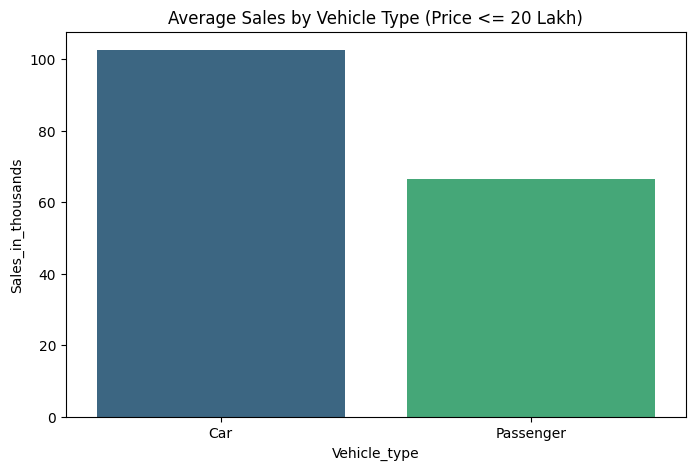

Best car type within 20 lakh range: Car


In [6]:
# Q1: Best car type within the range of 20 lakh (based on average sales)
df_budget = df_cleaned[df_cleaned['Price_in_thousands'] <= 20]
avg_sales = df_budget.groupby('Vehicle_type')['Sales_in_thousands'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_sales, x='Vehicle_type', y='Sales_in_thousands', palette='viridis')
plt.title('Average Sales by Vehicle Type (Price <= 20 Lakh)')
plt.show()

best_type = avg_sales.loc[avg_sales['Sales_in_thousands'].idxmax(), 'Vehicle_type']
print(f"Best car type within 20 lakh range: {best_type}")

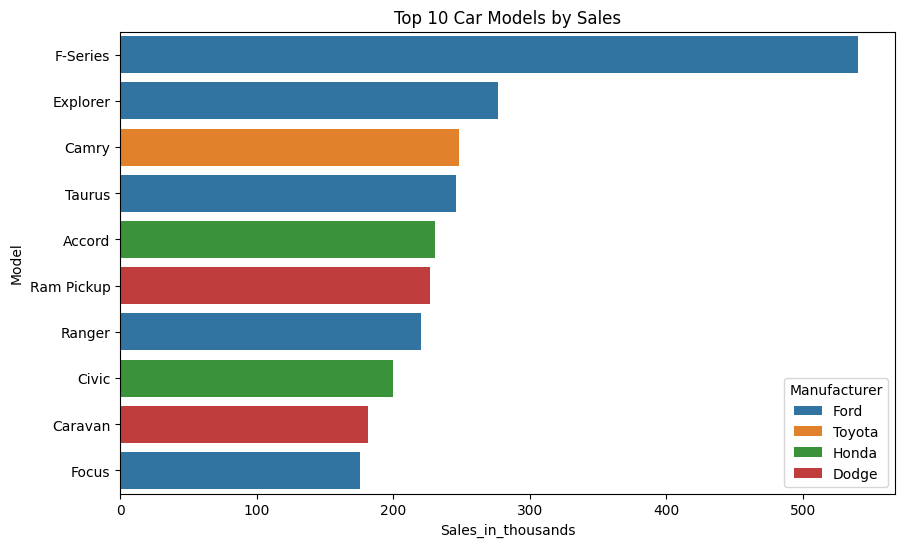

Car model with maximum sales: Ford F-Series (540.561k units)


In [7]:
# Q2: Which car is having maximum sales?
top_sales_row = df_cleaned.loc[df_cleaned['Sales_in_thousands'].idxmax()]

# Visualize top 10 models for context
top_10 = df_cleaned.nlargest(10, 'Sales_in_thousands')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='Sales_in_thousands', y='Model', hue='Manufacturer')
plt.title('Top 10 Car Models by Sales')
plt.show()

print(f"Car model with maximum sales: {top_sales_row['Manufacturer']} {top_sales_row['Model']} ({top_sales_row['Sales_in_thousands']}k units)")

/tmp/ipython-input-3220591776.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sec, x='Power_perf_factor', y='Model', palette='magma')


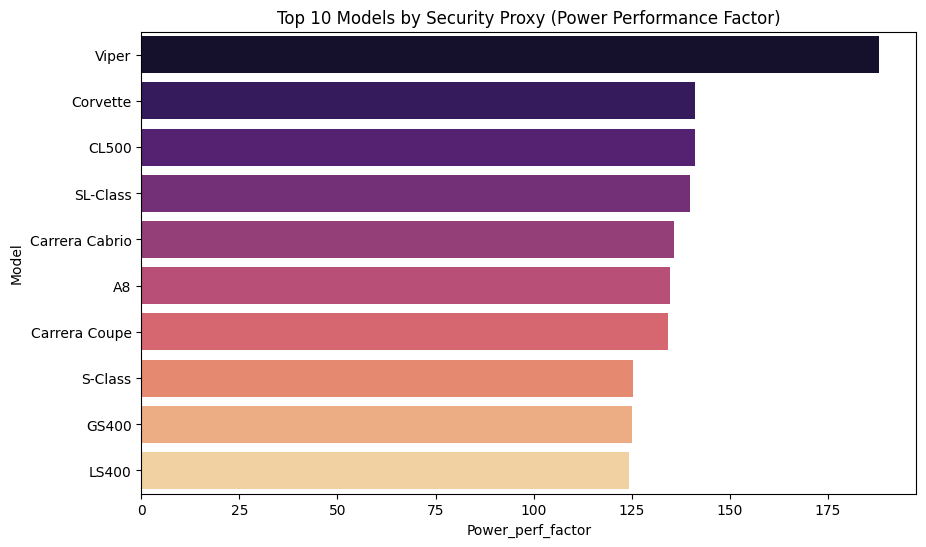

Model with best security features: Dodge Viper


In [8]:
# Q3: Best car model with the best security feature (Proxy: Power_perf_factor)
best_sec_row = df_cleaned.loc[df_cleaned['Power_perf_factor'].idxmax()]

plt.figure(figsize=(10, 6))
top_sec = df_cleaned.nlargest(10, 'Power_perf_factor')
sns.barplot(data=top_sec, x='Power_perf_factor', y='Model', palette='magma')
plt.title('Top 10 Models by Security Proxy (Power Performance Factor)')
plt.show()

print(f"Model with best security features: {best_sec_row['Manufacturer']} {best_sec_row['Model']}")

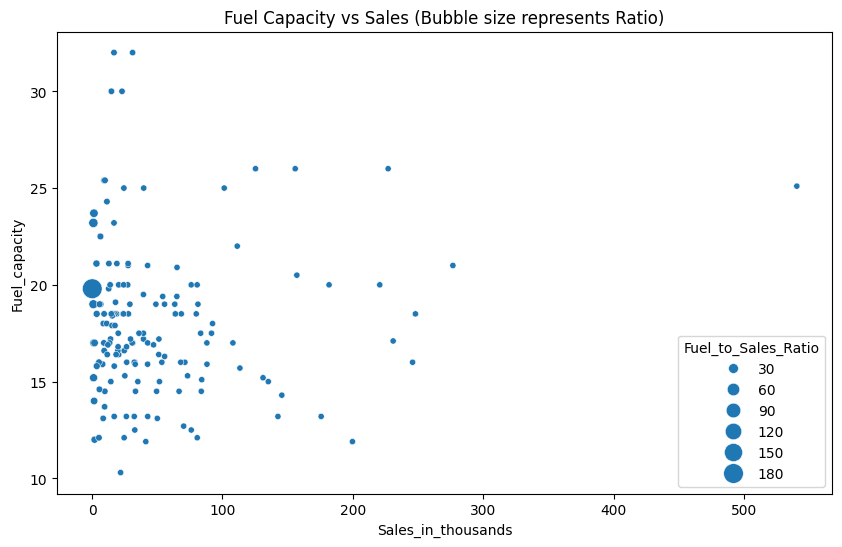

Model with highest fuel capacity relative to sales: Mitsubishi 3000GT


In [9]:
# Q4: Which car model has highest fuel capacity relative to yearly sales?
df_cleaned['Fuel_to_Sales_Ratio'] = df_cleaned['Fuel_capacity'] / df_cleaned['Sales_in_thousands']
best_fuel_row = df_cleaned.loc[df_cleaned['Fuel_to_Sales_Ratio'].idxmax()]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Sales_in_thousands', y='Fuel_capacity', size='Fuel_to_Sales_Ratio', sizes=(20, 200))
plt.title('Fuel Capacity vs Sales (Bubble size represents Ratio)')
plt.show()

print(f"Model with highest fuel capacity relative to sales: {best_fuel_row['Manufacturer']} {best_fuel_row['Model']}")